In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB  

In [2]:
def importdata(): 
    balance_data = pd.read_csv('golf_dataset.csv') 
    balance_data['Outlook'].replace(['Rainy','Overcast','Sunny'],[0,1,2],inplace=True)
    balance_data['Temp'].replace(['Hot','Mild','Cool'],[0,1,2],inplace=True)
    balance_data['Humidity'].replace(['Normal','High'],[0,1],inplace=True)
    balance_data['Play Golf'].replace(['No','Yes'],[0,1],inplace=True)
    print ("Dataset: ",balance_data.head()) 
    return balance_data

In [3]:
def splitdataset(balance_data):
    X = balance_data.values[:, 0:4]
    Y = balance_data.values[:, 4]
    X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size = 0.3, random_state = 1)  
    return X, Y, X_train, X_test, y_train, y_test

In [4]:
data = importdata()
data

Dataset:     Outlook  Temp  Humidity  Windy  Play Golf
0        0     0         1      0          0
1        0     0         1      1          0
2        1     0         1      0          1
3        2     1         1      0          1
4        2     2         0      0          1


,Outlook,Temp,Humidity,Windy,Play Golf
0,0,0,1,0,0
1,0,0,1,1,0
2,1,0,1,0,1
3,2,1,1,0,1
4,2,2,0,0,1
5,2,2,0,1,0
6,1,2,0,1,1
7,0,1,1,0,0
8,0,2,0,0,1
9,2,1,0,0,1


In [5]:
data = importdata()
X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
classifier = GaussianNB()  
classifier.fit(X_train, y_train)

Dataset:     Outlook  Temp  Humidity  Windy  Play Golf
0        0     0         1      0          0
1        0     0         1      1          0
2        1     0         1      0          1
3        2     1         1      0          1
4        2     2         0      0          1


GaussianNB()

In [7]:
y_pred = classifier.predict(X_test)  
print(y_pred)

[1 0 1 0 0]


In [8]:
cm = confusion_matrix(y_test, y_pred)  
cm

array([[1, 0],
       [2, 2]], dtype=int64)

Accuracy: 0.6


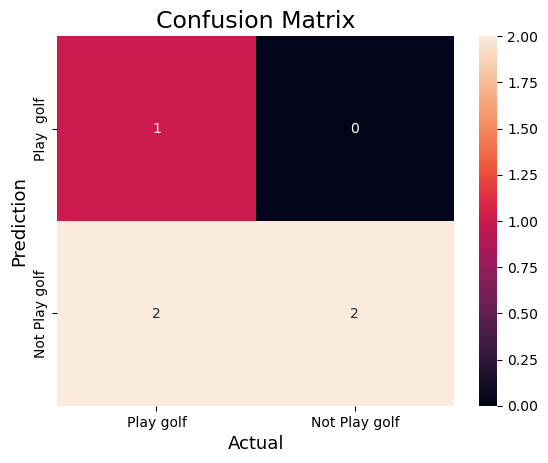

In [9]:
print("Accuracy:",accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Play golf','Not Play golf'],
            yticklabels=['Play  golf','Not Play golf'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [12]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.33      1.00      0.50         1\n           1       1.00      0.50      0.67         4\n\n    accuracy                           0.60         5\n   macro avg       0.67      0.75      0.58         5\nweighted avg       0.87      0.60      0.63         5\n'